In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

In [3]:
def Binarize(img):
    ret = np.zeros_like(img)
    for i in range(img.shape[1]):
        for j in range(img.shape[0]):
            ret[i,j] =  0 if img[i,j] < 128 else 255
    return ret

def DownSample(img):
    ret = np.zeros(shape=(64,64))
    for i in range(64):
        for j in range(64):
            ret[i,j] = img[i*8,j*8]
    return ret

In [4]:
def Yokoi(img):
    def h(b,c,d,e):
        if b == c and (d != b or e != b):
            return 'q'
        if b == c and (d == b and e == b):
            return 'r'
        if b != c:
            return 's'
    def f(a1,a2,a3,a4):
        if(a1 == a2 and a2 == a3 and a3 == a4 and a4 == 'r'):
            return 5
        else:
            return [a1,a2,a3,a4].count('q')


    ret = np.zeros(shape=(64,64))
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            if img[row,col] == 255:
                x0 = img[row,col]
                x1 = img[row,col+1] if col+1 < img.shape[1] else 0
                x2 = img[row-1,col] if row-1 >= 0 else 0
                x3 = img[row,col-1] if col-1 >= 0 else 0
                x4 = img[row+1,col] if row+1 < img.shape[0] else 0
                x5 = img[row+1,col+1] if row+1 < img.shape[0] and col+1 < img.shape[1] else 0
                x6 = img[row-1,col+1] if row-1 >= 0 and col+1 < img.shape[1] else 0
                x7 = img[row-1,col-1] if row-1 >= 0 and col-1 >= 0 else 0
                x8 = img[row+1,col-1] if row+1 < img.shape[0] and col-1 >= 0 else 0
                a1 = h(x0,x1,x6,x2)
                a2 = h(x0,x2,x7,x3)
                a3 = h(x0,x3,x8,x4)
                a4 = h(x0,x4,x5,x1)
                ret[row,col] = f(a1,a2,a3,a4)
    return ret


In [22]:
def PairRelationship(img,m):
    def h(a, m):
        return 1 if a==m else 0
    def y(a0,a1,a2,a3,a4,m):
        # p = 1, q = 2
        sum = h(a1,m) + h(a2,m) + h(a3,m) + h(a4,m)
        if(sum < 1 or a0 != m):
            return 2
        elif(sum >= 1 and a0 == m):
            return 1
    ret = np.zeros(shape=(64,64))
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            if img[row,col] != 0 :
                x0 = img[row,col]
                x1 = img[row,col+1] if col+1 < img.shape[1] else 0
                x2 = img[row-1,col] if row-1 >= 0 else 0
                x3 = img[row,col-1] if col-1 >= 0 else 0
                x4 = img[row+1,col] if row+1 < img.shape[0] else 0
                ret[row,col] = y(x0,x1,x2,x3,x4,m)
    return ret


In [24]:
def Shrink(img,mark):
    def h(b,c,d,e):
        return 1 if b == c and (d != b or e != b) else 0
    def f(a1,a2,a3,a4,x):
        if([a1,a2,a3,a4].count(1) == 1):
            return 0
        else:
            return x
    ret = np.zeros(shape=(64,64))
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            ret[row,col] = img[row,col]
            
    for row in range(ret.shape[0]):
        for col in range(ret.shape[1]):
            if mark[row,col] == 1:
                x0 = ret[row,col]
                x1 = ret[row,col+1] if col+1 < ret.shape[1] else 0
                x2 = ret[row-1,col] if row-1 >= 0 else 0
                x3 = ret[row,col-1] if col-1 >= 0 else 0
                x4 = ret[row+1,col] if row+1 < ret.shape[0] else 0
                x5 = ret[row+1,col+1] if row+1 < ret.shape[0] and col+1 < ret.shape[1] else 0
                x6 = ret[row-1,col+1] if row-1 >= 0 and col+1 < ret.shape[1] else 0
                x7 = ret[row-1,col-1] if row-1 >= 0 and col-1 >= 0 else 0
                x8 = ret[row+1,col-1] if row+1 < ret.shape[0] and col-1 >= 0 else 0
                a1 = h(x0,x1,x6,x2)
                a2 = h(x0,x2,x7,x3)
                a3 = h(x0,x3,x8,x4)
                a4 = h(x0,x4,x5,x1)
                ret[row,col] = f(a1,a2,a3,a4,x0)
    return ret

In [39]:
img = Binarize(raw_img)
img = DownSample(img)
for i in range(10):
    YokoiImg = Yokoi(img)
    MarkImg = PairRelationship(YokoiImg,1)
    img = Shrink(img,MarkImg)

True

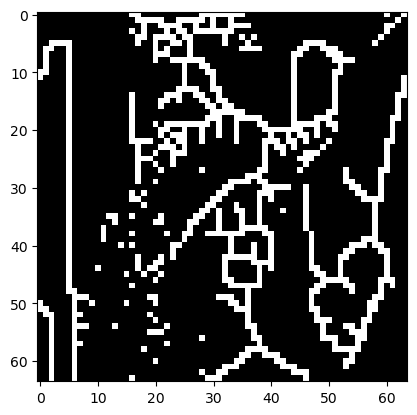

In [42]:
plt.imshow(img,cmap='gray')
cv2.imwrite('Shrink.png',img)